In [12]:
# Import pandas dan numpy
import pandas as pd
import numpy as np

In [13]:
# membuat jalur untuk mengakses google drive
path = ('/content/drive')

In [35]:
# membuka file csv
df = pd.read_csv(path + '/MyDrive/DM_Tabiin_DE02/df_arabica_clean.csv')
df

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [38]:
df['Aroma'].mean()

7.721062801932368

In [33]:
df['Aroma'].median()

10.0

In [39]:
df['Aroma'].mode()

,Aroma
0,7.67


In [40]:
# Menghitung kuartil pertama
q1 = df['Aroma'].quantile(0.25)

# Menghitung kuartil ketiga
q3 = df['Aroma'].quantile(0.75)
print('Q3 :', q3)
# Menghitung rentang interkuartil
iqr = q3 - q1
print('IQR :', iqr)

Q3 : 7.92
IQR : 0.33999999999999986


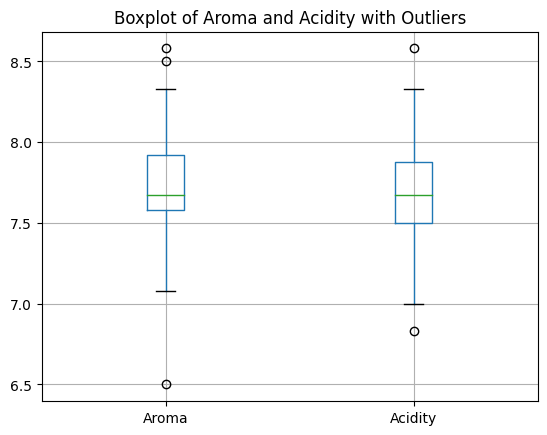

In [43]:
# Membuat fungsi untuk mendeteksi outlier
import matplotlib.pyplot as plt

df.boxplot(column=['Aroma', 'Acidity'])
plt.title('Boxplot of Aroma and Acidity with Outliers')
plt.show()

In [44]:
# Menghitung kuartil pertama
q1 = df['Aroma'].quantile(0.25)

# Menghitung kuartil ketiga
q3 = df['Aroma'].quantile(0.75)
print('Q3 :', q3)
# Menghitung rentang interkuartil
iqr = q3 - q1
print('IQR :', iqr)

# Menghitung batas bawah dan atas
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Aroma'] < lower_bound) | (df['Aroma'] > upper_bound)]

print('Outlier Aroma')
print(outliers)

Q3 : 7.92
IQR : 0.33999999999999986
Outlier Aroma
     Unnamed: 0   ID Country of Origin                             Farm Name  \
0             0    0          Colombia                      Finca El Paraiso   
1             1    1            Taiwan              Royal Bean Geisha Estate   
205         205  205       El Salvador  Rosario de Maria II, Area de La Pila   

                                  Lot Number  \
0                                 CQU2022015   
1    The 2022 Pacific Rim Coffee Summit,T037   
205                                  0423A01   

                                          Mill ICO Number  \
0                             Finca El Paraiso        NaN   
1                     Royal Bean Geisha Estate        NaN   
205  Optimum Coffee, San Salvador, El Salvador        NaN   

                       Company   Altitude  \
0         Coffee Quality Union  1700-1930   
1     Taiwan Coffee Laboratory       1200   
205  Aprentium Enterprises LLC       1200   

          

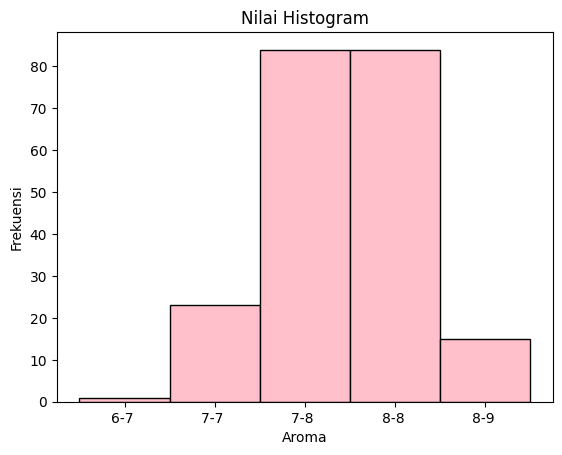

In [46]:
data_aroma = df['Aroma']
# Membuat histogram
n, bins, patches = plt.hist(data_aroma, bins=5, color='pink', edgecolor='black')

# Menambahkan label
plt.title('Nilai Histogram')
plt.xlabel('Aroma')
plt.ylabel('Frekuensi')

# Menambahkan rentang frekuensi pada sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f} ' .format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

# Menampilkan histogram
plt.show()

In [49]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((df['Aroma'] > upper_bound) | (df['Aroma'] < lower_bound)) | (df['Acidity'] < 3) | (df['Acidity'] > 10)

# Drop baris yang memenuhi kondisi di atas (outliers)
df_cleaned = df[~outliers_condition]

# Menampilkan data setelah penghapusan outliers
print(df_cleaned.tail())

     Unnamed: 0   ID Country of Origin          Farm Name        Lot Number  \
201         201  201            Brazil       Various farm     002/1738/0029   
202         202  202            Brazil  Fazenda Conquista            019/22   
203         203  203         Nicaragua   Finca San Felipe      017-053-0155   
204         204  204              Laos                  -  105/3/VL7285-005   
206         206  206            Brazil      Walter Matter       1058 y 1059   

                          Mill        ICO Number  \
201                   Dry mill     002/1738/0029   
202                   Dry Mill               NaN   
203  Beneficio Atlantic Sébaco      017-053-0155   
204                   DRY MILL  105/3/VL7285-005   
206      Beneficio humedo/seco     002/1208/1016   

                                Company  Altitude                Region  ...  \
201                            marubeni      1200  Alta Mogiana-Ibiraci  ...   
202                     Ipanema Coffees       950   

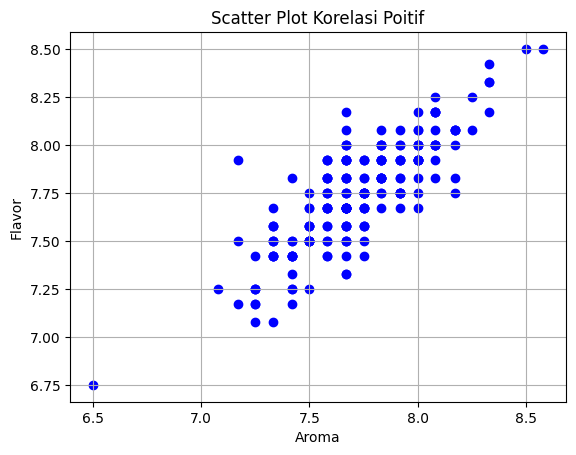

In [57]:
# Membuat Scatter Plot
plt.scatter(df['Aroma'], df['Flavor'], color='blue', marker='o')

# Menambahkan Label
plt.title('Scatter Plot Korelasi Poitif')
plt.xlabel('Aroma')
plt.ylabel('Flavor')

# Menampilkan plot
plt.grid(True)
plt.show()


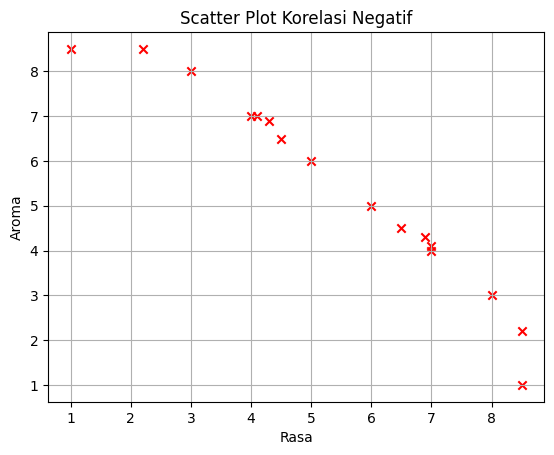

In [73]:
# Membuat dataframe
data = {'Rasa': [1.0, 2.2, 3.0, 4.0, 4.1, 4.3, 4.5, 5.0, 6.0, 6.5, 6.9, 7.0, 7.0, 8.0, 8.5, 8.5],
        'Aroma': [8.5, 8.5, 8.0, 7.0, 7.0, 6.9, 6.5, 6.0, 5.0, 4.5, 4.3, 4.1, 4.0, 3.0, 2.2, 1.0]}

df = pd.DataFrame(data)

plt.scatter(df['Rasa'], df['Aroma'], color='red', marker='x')

# Menambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Rasa')
plt.ylabel('Aroma')

# Menampilkan plot
plt.grid(True)
plt.show()

In [75]:
df.describe()

,Rasa,Aroma
count,16.000000,16.000000
mean,5.406250,5.406250
std,2.252545,2.252545
min,1.000000,1.000000
25%,4.075000,4.075000
50%,5.500000,5.500000
75%,7.000000,7.000000
max,8.500000,8.500000
